In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv('mushroom/mushroom.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-sur-bel-ring,stalk-cl-ab-ring,stalk-cl-bl-ring,veil-type,veil color,ring-number,ring-type,spore-prt-clr,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-sur-ab-ring', 'stalk-sur-bel-ring',
       'stalk-cl-ab-ring', 'stalk-cl-bl-ring', 'veil-type', 'veil color',
       'ring-number', 'ring-type', 'spore-prt-clr', 'population', 'habitat'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                 8124 non-null object
cap-shape             8124 non-null object
cap-surface           8124 non-null object
cap-color             8124 non-null object
bruises               8124 non-null object
odor                  8124 non-null object
gill-attachment       8124 non-null object
gill-spacing          8124 non-null object
gill-size             8124 non-null object
gill-color            8124 non-null object
stalk-shape           8124 non-null object
stalk-root            8124 non-null object
stalk-sur-ab-ring     8124 non-null object
stalk-sur-bel-ring    8124 non-null object
stalk-cl-ab-ring      8124 non-null object
stalk-cl-bl-ring      8124 non-null object
veil-type             8124 non-null object
veil color            8124 non-null object
ring-number           8124 non-null object
ring-type             8124 non-null object
spore-prt-clr         8124 non-nu

In [10]:
np.sum(df.isna())

class                 0
cap-shape             0
cap-surface           0
cap-color             0
bruises               0
odor                  0
gill-attachment       0
gill-spacing          0
gill-size             0
gill-color            0
stalk-shape           0
stalk-root            0
stalk-sur-ab-ring     0
stalk-sur-bel-ring    0
stalk-cl-ab-ring      0
stalk-cl-bl-ring      0
veil-type             0
veil color            0
ring-number           0
ring-type             0
spore-prt-clr         0
population            0
habitat               0
dtype: int64

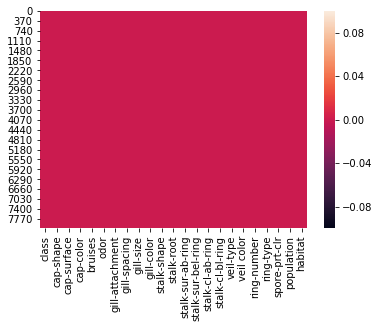

In [13]:
sns.heatmap(df.isnull())

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [21]:
data=df.apply(le.fit_transform)

In [22]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-sur-bel-ring,stalk-cl-ab-ring,stalk-cl-bl-ring,veil-type,veil color,ring-number,ring-type,spore-prt-clr,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [24]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-sur-ab-ring', 'stalk-sur-bel-ring',
       'stalk-cl-ab-ring', 'stalk-cl-bl-ring', 'veil-type', 'veil color',
       'ring-number', 'ring-type', 'spore-prt-clr', 'population', 'habitat'],
      dtype='object')

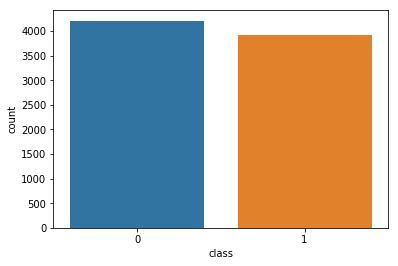

In [25]:
sns.countplot(data['class'])

In [26]:
x=data.drop('class',axis=1)

In [27]:
y=data['class']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
pre=knn.predict(x_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [35]:
print(classification_report(y_test,pre))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1691
          1       1.00      1.00      1.00      1559

avg / total       1.00      1.00      1.00      3250



In [36]:
r2_score(y_test,pre)

0.993835985629691